In [1]:
# 6

# 訓練・テストデータのラベル付

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


names = ["白石麻衣","斎藤飛鳥","山下美月","西野七瀬","生田絵梨花"]


# 訓練データのラベル付

x_train=[]   # 訓練データ
y_train=[]   # 訓練データのラベル ( 答え )

for i in range(len(names)):
    img_file_name_list=os.listdir("./train/"+names[i])
    #print(img_file_name_list)   # ファイルに入っている画像の名前が全て出力される : 例 : 1260枚分
    print(len(img_file_name_list))   # 1回目 : 1260
    
    for j in range(0,len(img_file_name_list)-1):
        n=os.path.join("./train/"+names[i]+"/",img_file_name_list[j])
        img=cv2.imread(n)   # 画像の読み込み
        b,g,r=cv2.split(img)
        img=cv2.merge([r,g,b])
        
        x_train.append(img)
        y_train.append(i)   # ラベル付
        
        
# テストデータのラベル付

x_test=[]
y_test=[]

for i in range(len(names)):
    img_file_name_list=os.listdir("./test/"+names[i])
    #print(img_file_name_list)   # ファイルに入っている画像の名前が全て出力される : 例 : 1260枚分
    print(len(img_file_name_list))   # 1回目 : 1260
    
    for j in range(0,len(img_file_name_list)-1):
        n=os.path.join("./test/"+names[i]+"/",img_file_name_list[j])
        img=cv2.imread(n)   # 画像の読み込み
        b,g,r=cv2.split(img)   # RGB 分離 , 順番は b,g,r
        img=cv2.merge([r,g,b])
        
        x_test.append(img)
        y_test.append(i)   # ラベル付

# numpy で処理ができるように 型 を変形
x_train=np.array(x_train)
x_test=np.array(x_test)



# モデルを作成

#  Activation : 活性化関数
# Conv2D : 畳み込み層
# Dense : レイヤ , 様々なパラメータがある util : ニューロン数
# Flatten : 入力を平坦にする 扱いやすくする
# MaxPooling2D : プーリング手法の一つ
from keras.layers import Activation,Conv2D,Dense,Flatten,MaxPooling2D

# モデルを作る上で軸となるもの , これにレイヤを追加していく
# 参考 : http://marupeke296.com/IKDADV_DL_No2_Keras.html
from keras.models import Sequential

# One-hot-label 化
# 例 : [1,4]=[[0,1,0,0,0,0],[0,0,0,0,1,0]]
# ラベル化は 0 からスタート
from keras.utils.np_utils import to_categorical

# 訓練・テストラベル を One-hot-label 化
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#モデルの定義
model=Sequential()

# input_shape( 入力データサイズ1 , 入力サイズ2 , チャンネル数 ) 
# filters : 2次元の畳み込みウィンドウの幅と高さを指定
# kernel_size : フィルターのサイズ
# stride : ストライド数
# padding : ( same ゼロパディング , valid パディングなし )

# Conv2D()
# 参考 : https://keras.io/ja/layers/convolutional/
model.add(Conv2D(input_shape=(64,64,3),filters=32,kernel_size=(3,3),
                strides=(1,1),padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),
                strides=(1,1),padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),
                strides=(1,1),padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

# Dense()
# https://keras.io/ja/layers/core/
model.add(Dense(256,activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(5,activation="softmax"))



# コンパイル 
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])


# , 学習 , 訓練データを使用
# epoch : 単にepochsという指標に試行が達するまで訓練します．
# verbose : 進歩ログの可視性   1 : オン , 0 : オフ , 2 : エポックごとにオン
# URL : https://keras.io/ja/models/sequential/#fit
history=model.fit(x_train,y_train,batch_size=32,
                 epochs=50,verbose=1,validation_data=(x_test,y_test))


# 汎化性能を評価・表示 , テストデータを使用
score=model.evaluate(x_test,y_test,batch_size=32,verbose=0)
print("validation loss:{0[0]}\nvalidation accuracy:{0[1]}".format(score))


# 訓練データ・テストデータの精度推移をグラフ化
# history : 実行に成功したエポックにおける訓練の損失値と評価関数値の記録と，
#              （適用可能ならば）検証における損失値と評価関数値も記録しています．
plt.plot(history.history["acc"],label="acc",ls="-",marker="o")
plt.plot(history.history["val_acc"],label="val_acc",ls="-",marker="x")

plt.ylabel("accuracy")
plt.xlabel("epoch")

# plt.legend : 凡例の位置
# best : 自動調節
plt.legend(loc="best")
plt.show()


# モデルを保存
model.save("my_model.h5")


"""

モデルの層数の変化
使っているレイヤ
データのサイズ変化
Sequential でできること
畳み込み層でのサイズの変化
レイヤでのニューロン数の変化
レイヤでのデータサイズ変化

compile , fit , evaluate の役割と流れ


"""








1152
1152
1152
1152
1152
32
32
32
32
32
Epoch 1/50
180/180 [==============================] - 17s 92ms/step - loss: 1.6178 - accuracy: 0.2825 - val_loss: 1.5269 - val_accuracy: 0.4258
Epoch 2/50
180/180 [==============================] - 16s 89ms/step - loss: 1.5152 - accuracy: 0.3872 - val_loss: 1.4663 - val_accuracy: 0.4452
Epoch 3/50
180/180 [==============================] - 16s 91ms/step - loss: 1.4441 - accuracy: 0.4234 - val_loss: 1.3873 - val_accuracy: 0.4516
Epoch 4/50
180/180 [==============================] - 15s 82ms/step - loss: 1.3690 - accuracy: 0.4350 - val_loss: 1.3157 - val_accuracy: 0.4000
Epoch 5/50
180/180 [==============================] - 15s 82ms/step - loss: 1.3180 - accuracy: 0.4572 - val_loss: 1.2305 - val_accuracy: 0.4710
Epoch 6/50
180/180 [==============================] - 14s 79ms/step - loss: 1.2592 - accuracy: 0.4840 - val_loss: 1.2085 - val_accuracy: 0.5226
Epoch 7/50
180/180 [==============================] - 14s 80ms/step - loss: 1.2285 - accuracy: 0

KeyError: 'acc'

{'loss': [1.574161171913147, 1.495879888534546, 1.420901894569397, 1.3515429496765137, 1.301984190940857, 1.2532165050506592, 1.2209346294403076, 1.1927211284637451, 1.1726710796356201, 1.1363403797149658, 1.0987770557403564, 1.0587433576583862, 1.0170215368270874, 0.9672185778617859, 0.9093563556671143, 0.851676881313324, 0.7973771095275879, 0.7356631755828857, 0.6770455241203308, 0.615681529045105, 0.5567992329597473, 0.5033532977104187, 0.4559275507926941, 0.408701092004776, 0.37519967555999756, 0.32317912578582764, 0.29020339250564575, 0.25728827714920044, 0.22396881878376007, 0.19489534199237823, 0.16248388588428497, 0.140634223818779, 0.11980575323104858, 0.10239432752132416, 0.08748213201761246, 0.0745079442858696, 0.06346169859170914, 0.055716611444950104, 0.04878510162234306, 0.04240226000547409, 0.03815042972564697, 0.034142155200242996, 0.03111165575683117, 0.02843969687819481, 0.026409683749079704, 0.024859916418790817, 0.02343297190964222, 0.022359253838658333, 0.021358039

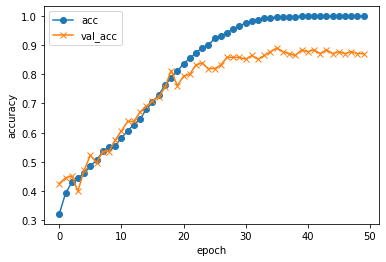

In [3]:
# 6

print(history.history)



#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

#モデルを保存
model.save("my_model.h5")

In [9]:
# 2021_0122
# Keras チュートリアル
# URL : https://keras.io/ja/

# Keras のみ インストールしていたらエラーが出る
# ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`
# 意味 : tensorflow をインストールしてください
from keras.models import Sequential

# 学習モデルの作成 
model=Sequential()

# layer の積み重ね用ライブラリ
from keras.layers import Dense

# .add() でレイヤーを積み重ねる
model.add(Dense(units=64,activation="relu",input_dim=100))
model.add(Dense(units=10,activation="softmax"))

# 訓練の 損失関数・最適化手法(勾配を求める手法) を設定
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# 訓練データをミニバッチで繰り返し処理するとき
# epoch : 全ての学習から何回注目して学習を行うか
model.fit(x_train,t_train,epoch=5,batch_size=32)

# 新しいデータに対しての予測
classes=model.predict(x_test,batcn_size=128)



NameError: name 'x_train' is not defined